In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

2024-04-11 16:04:25.489083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = pd.read_csv('NY-House-Dataset.csv')

In [7]:
# Define a function to remove outliers based on the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# **RF & SVM Regressor**

In [32]:
# Selecting relevant features and target
X = data[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
y = data['PRICE']

# Check for nulls in the selected columns
null_counts = X.isnull().sum().sum() + y.isnull().sum()

# Remove rows with any null values in the selected features or target
data_clean = data[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'PRICE']].dropna()

# Remove outliers from 'PRICE'
data_no_outliers = remove_outliers(data_clean, 'PRICE')

# Splitting the data into features and target without outliers and nulls
X_no_outliers = data_no_outliers[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
y_no_outliers = data_no_outliers['PRICE']

# Splitting the data into training and testing sets
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Preprocessing: One-hot encoding for 'TYPE'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['TYPE']),
    ],
    remainder='passthrough'  # Keep the other columns unchanged
)

# Random Forest model pipeline
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# SVM model pipeline
svm_pipeline = make_pipeline(
    preprocessor,
    SVR(C=1.0, epsilon=0.2)
)

# Fit the models with the cleaned data
rf_pipeline.fit(X_train_no, y_train_no)
svm_pipeline.fit(X_train_no, y_train_no)

# Predictions with the cleaned data
rf_predictions_no = rf_pipeline.predict(X_test_no)
svm_predictions_no = svm_pipeline.predict(X_test_no)

# Evaluation with the cleaned data
rf_mae_no = mean_absolute_error(y_test_no, rf_predictions_no)
svm_mae_no = mean_absolute_error(y_test_no, svm_predictions_no)

rf_rmse_no = np.sqrt(mean_squared_error(y_test_no, rf_predictions_no))
svm_rmse_no = np.sqrt(mean_squared_error(y_test_no, svm_predictions_no))

print('Nulls:', null_counts)
print('Original Data Shape:', data_clean.shape[0])
print('Outliers_Removed Shape:', data_no_outliers.shape[0]) 
print('Random Forest Mean Absolute Error:', rf_mae_no)
print('Random Forest Root Mean Standard Error:',rf_rmse_no)
print('SVM Mean Absolute Error:', svm_mae_no)
print('SVM Root Mean Standard Error:', svm_rmse_no)


Nulls: 0
Original Data Shape: 4801
Outliers_Removed Shape: 4242
Random Forest Mean Absolute Error: 308108.9222534209
Random Forest Root Mean Standard Error: 444260.4411947408
SVM Mean Absolute Error: 457019.83995797246
SVM Root Mean Standard Error: 634691.0923800695


# **Time-Series**

In [7]:
# Assuming 'data_no_outliers' is your DataFrame
number_of_rows = len(data_no_outliers)

# Generate random dates
np.random.seed(42)  # For reproducible results
random_dates = pd.date_range(start='2017-01-01', end='2018-12-31', periods=number_of_rows)
random_dates = np.random.choice(random_dates, size=number_of_rows, replace=True)

# Add the random dates to your DataFrame
data_no_outliers['DATE'] = random_dates

# Shuffle the DataFrame if necessary
data_no_outliers = data_no_outliers.sample(frac=1).reset_index(drop=True)

data_no_outliers['DATE'] = pd.to_datetime(data_no_outliers['DATE'])
data_no_outliers


/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_2495/3000927076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['DATE'] = random_dates


,TYPE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE,DATE
0,Multi-family home for sale,12,8.000000,5100.000000,40.574518,-74.006830,1998000,2017-01-23 20:41:01.683565196
1,House for sale,3,2.000000,2000.000000,40.552849,-74.169938,849000,2018-04-24 21:28:54.213628856
2,Multi-family home for sale,5,2.000000,2184.207862,40.593969,-73.758887,848000,2018-12-06 05:56:10.808771512
3,Multi-family home for sale,4,2.000000,2034.000000,40.866471,-73.845984,875000,2018-09-13 12:50:45.696769624
4,Contingent,7,4.000000,2268.000000,40.692774,-73.951031,2499000,2018-12-26 08:36:47.026644656
...,...,...,...,...,...,...,...,...
4237,Co-op for sale,1,2.000000,2184.207862,40.759577,-73.964779,330000,2017-08-21 21:58:26.625795800
4238,Condo for sale,1,1.000000,561.000000,40.583957,-73.942085,399000,2017-10-09 21:43:30.233435508
4239,Condo for sale,2,2.000000,1005.000000,40.856444,-73.937762,850000,2018-04-22 19:58:35.114359816
4240,Condo for sale,3,2.373861,1632.000000,40.577069,-74.161888,650000,2017-10-21 14:15:18.462626736


/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_2495/3184707262.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data_no_outliers['PRICE'].resample('M').mean()


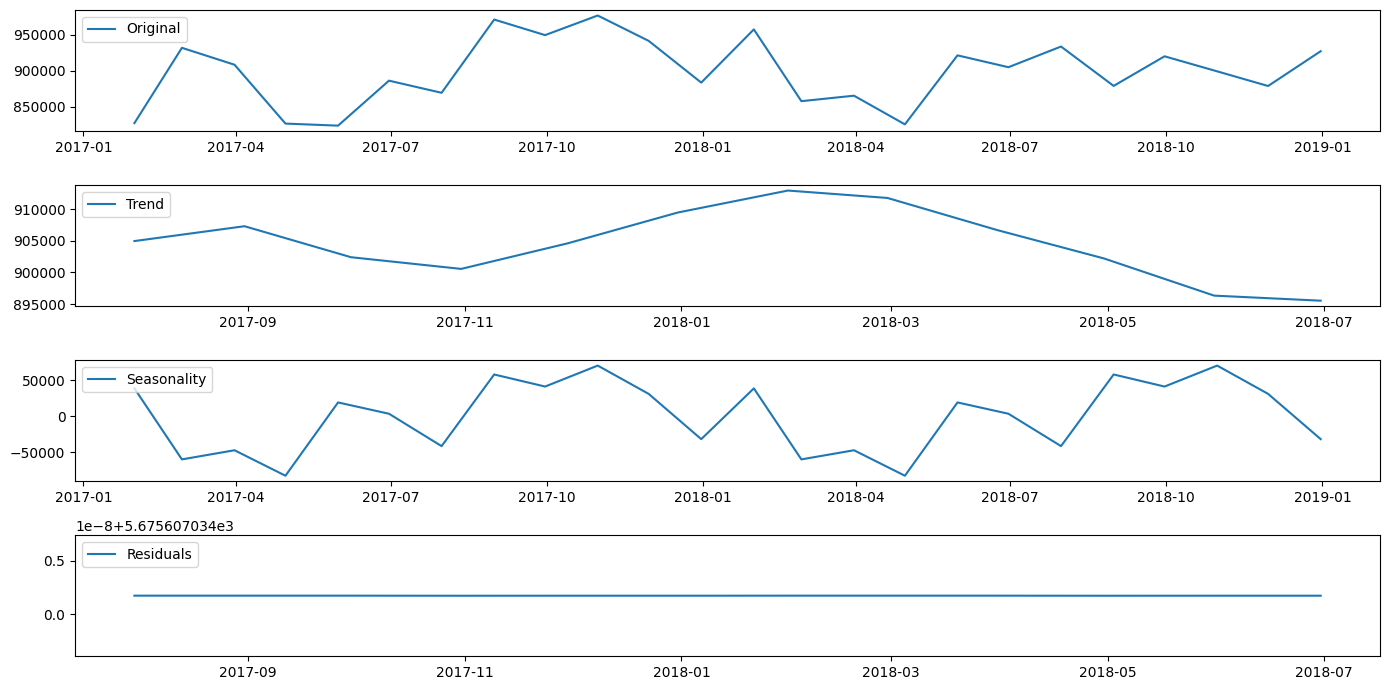

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# For the sake of this example, we're pretending the 'DATE' column has been set as the index
# and the DataFrame has been sorted by this index. We're simulating this with the existing data.

# Simulate resampling by month and calculating the mean price
data_no_outliers.set_index('DATE', inplace=True)  # Pretend 'DATE' is already in datetime format
monthly_prices = data_no_outliers['PRICE'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_prices, model='additive')

# Plotting the original time series and its decomposed components
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(monthly_prices, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# **Random Forest and SVM Classifier**

In [26]:
# Preliminary data cleaning
# For simplicity, we'll focus on a few relevant features and drop rows with missing values in these columns.
data_clean = data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'TYPE', 'LOCALITY']].dropna()

data_clean = pd.get_dummies(data_clean, columns=['LOCALITY'], drop_first=True)

# Categorize the 'PRICE' into categories (low, medium, high)
# For the sake of this example, we'll use quantiles to define these categories
price_categories = pd.qcut(data_clean['PRICE'], q=3, labels=['low', 'medium', 'high'])
data_clean['PRICE_CATEGORY'] = price_categories

# Encode the 'TYPE' column since it's categorical
data_clean = pd.get_dummies(data_clean, columns=['TYPE'], drop_first=True)

# Step 4: Splitting the data into features (X) and target (y)
X = data_clean.drop(['PRICE', 'PRICE_CATEGORY'], axis=1)
y = data_clean['PRICE_CATEGORY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters
# Define the parameter grid
param = {
    'n_estimators': [300, 600, 900],  # Number of trees in the forest
    'max_features': ['sqrt'],  # Number of features to consider at every split
    'max_depth': [2, 5, 9],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores;
grid = GridSearchCV(estimator=RF,
                    param_grid=param,
                    scoring="accuracy",
                    verbose=3, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-04-11 16:24:00.883097
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=300;, score=0.676 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=300;, score=0.656 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=300;, score=0.680 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=300;, score=0.673 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=300;, score=0.652 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=600;, score=0.667 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=600;, score=0.647 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=600;, score=0.663 total time=   1.3s
[CV 4


Accuracy: 0.740894901144641


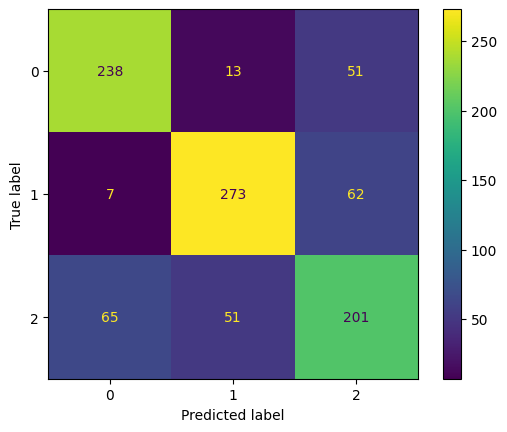

In [28]:
# confusion matrix
from sklearn import metrics

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [29]:
# SVM - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

# find the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVM -- Tunning parameters
param = {
    'C':[.00001, .0001, .001, 0.01],
    'gamma': [.00001, .0001, .001, .01], # 1/n_features
    'kernel': ['rbf','linear']
}

SVM = SVC(random_state=10)


# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores;
grid = GridSearchCV(estimator= SVM,
                    param_grid=param,
                    verbose=3, cv=3,
                    refit=True)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-04-11 16:27:36.937271
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END ..C=1e-05, gamma=1e-05, kernel=rbf;, score=0.336 total time=   1.2s
[CV 2/3] END ..C=1e-05, gamma=1e-05, kernel=rbf;, score=0.335 total time=   1.1s
[CV 3/3] END ..C=1e-05, gamma=1e-05, kernel=rbf;, score=0.336 total time=   1.1s
[CV 1/3] END C=1e-05, gamma=1e-05, kernel=linear;, score=0.509 total time=   0.5s
[CV 2/3] END C=1e-05, gamma=1e-05, kernel=linear;, score=0.531 total time=   0.5s
[CV 3/3] END C=1e-05, gamma=1e-05, kernel=linear;, score=0.520 total time=   0.5s
[CV 1/3] END .C=1e-05, gamma=0.0001, kernel=rbf;, score=0.336 total time=   1.1s
[CV 2/3] END .C=1e-05, gamma=0.0001, kernel=rbf;, score=0.335 total time=   1.1s
[CV 3/3] END .C=1e-05, gamma=0.0001, kernel=rbf;, score=0.336 total time=   1.1s
[CV 1/3] END C=1e-05, gamma=0.0001, kernel=linear;, score=0.509 total time=   0.5s
[CV 2/3] END C=1e-05, gamma=0.0001, kernel=linear;, score=0.531 total time=   


Accuracy: 0.7148803329864725


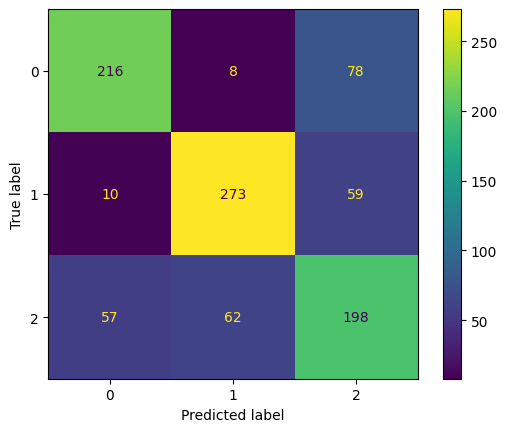

In [30]:
# confusion matrix

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures

# **Sequential CNN** 

In [14]:
# Selecting a subset of features for simplicity
# Numeric features for model input
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT']
# Categorical feature for one-hot encoding
categorical_features = ['TYPE']

# The target variable
target = data_no_outliers['PRICE'].values

# Features DataFrame
features = data_no_outliers[numeric_features + categorical_features]

# Preprocessing steps
# Standardize numeric features and one-hot encode categorical features
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features)
)

X = preprocessor.fit_transform(features)
y = target.reshape(-1, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model configuration
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Display model architecture
model.summary()

/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1196903628800.0000 - mae: 903769.0625 - val_loss: 1130322067456.0000 - val_mae: 884864.5000
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1186528493568.0000 - mae: 902121.4375 - val_loss: 1130101342208.0000 - val_mae: 884754.7500
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1170831441920.0000 - mae: 895774.5625 - val_loss: 1129385426944.0000 - val_mae: 884406.6875
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1253146492928.0000 - mae: 922490.5625 - val_loss: 1127871807488.0000 - val_mae: 883677.6250
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1204898234368.0000 - mae: 904330.8750 - val_loss: 1125329666048.0000 - val_mae: 882452.7500
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1194693492736.0000 - mae: 904951.1875 - val_loss: 1121486635008.0000 - val_mae: 880607.5000
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1206525755392.0000 - mae: 908682.0625 - va

In [16]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255230083072.0000 - mae: 341334.3125 
Test MAE: 336117.96875


# **K-Means**

## **ALL DATA**

In [17]:
from scipy import stats

# Removing null values
data_clean = data.dropna(subset=['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'])

# Removing outliers
z_scores = stats.zscore(data_clean[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_no_outliers = data_clean[filtered_entries]

# Summary of the cleaned dataset
data_no_outliers.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.691000e+03,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000
mean,1.702525e+06,3.138350,2.222964,1986.787464,40.714247,-73.941171
std,3.443223e+06,1.787496,1.309940,1121.953892,0.087852,0.101684
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.890000e+05,2.000000,1.000000,1196.000000,40.638537,-73.987143
50%,7.995000e+05,3.000000,2.000000,2184.207862,40.726843,-73.948818
75%,1.400000e+06,4.000000,3.000000,2184.207862,40.771979,-73.868737
max,6.000000e+07,11.000000,8.000000,9132.000000,40.912729,-73.702450


/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/l

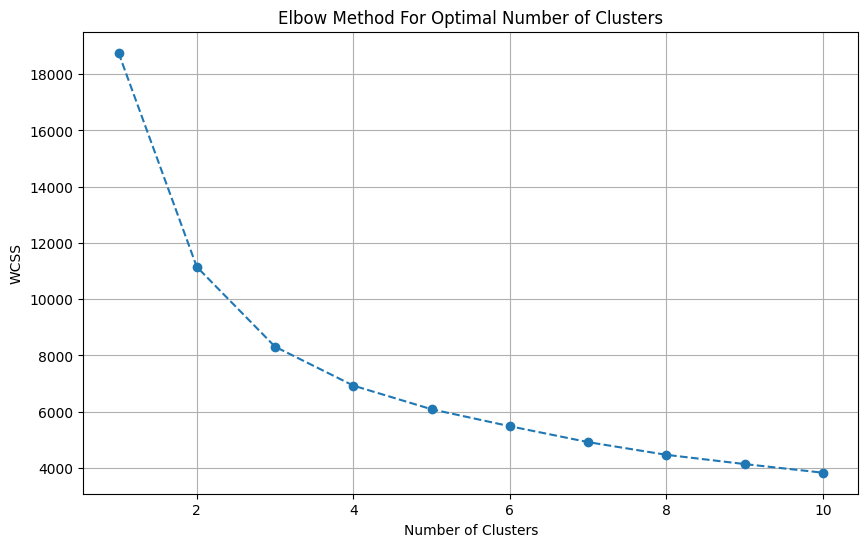

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extracting the features for clustering
features = data_no_outliers[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

# Preparing to calculate silhouette scores for a smaller range of cluster numbers
silhouette_scores = {}
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg

# Display silhouette scores for the range of cluster numbers
silhouette_scores

/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/l

{2: 0.5150660901055951,
 3: 0.47520860712752283,
 4: 0.33078182508291293,
 5: 0.30243460698376934}

## **LOCALITY**

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Selecting relevant features for clustering
features_for_clustering = data_no_outliers[['LATITUDE', 'LONGITUDE', 'PRICE', 'LOCALITY']]

# One-hot encoding 'LOCALITY'
one_hot_encoder = OneHotEncoder(sparse=False)
locality_encoded = one_hot_encoder.fit_transform(features_for_clustering[['LOCALITY']])

# Creating a DataFrame with the encoded locality data
locality_encoded_df = pd.DataFrame(locality_encoded, columns=one_hot_encoder.get_feature_names_out(['LOCALITY']))

# Resetting index to avoid issues during concatenation
features_for_clustering.reset_index(drop=True, inplace=True)
locality_encoded_df.reset_index(drop=True, inplace=True)

# Concatenating the encoded locality with the original data
clustering_data = pd.concat([features_for_clustering[['LATITUDE', 'LONGITUDE', 'PRICE']], locality_encoded_df], axis=1)

# Display the shape of the prepared data and the first few rows to confirm preparation
clustering_data.shape, clustering_data.head()


/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((4691, 14),
     LATITUDE  LONGITUDE   PRICE  LOCALITY_Bronx County  LOCALITY_Brooklyn  \
 0  40.761255 -73.974483  315000                    0.0                0.0   
 1  40.541805 -74.196109  260000                    0.0                0.0   
 2  40.761398 -73.974613   69000                    0.0                0.0   
 3  40.674363 -73.958725  690000                    0.0                0.0   
 4  40.809448 -73.946777  899500                    0.0                0.0   
 
    LOCALITY_Flatbush  LOCALITY_Kings County  LOCALITY_New York  \
 0                0.0                    0.0                1.0   
 1                0.0                    0.0                1.0   
 2                0.0                    0.0                1.0   
 3                0.0                    0.0                1.0   
 4                0.0                    0.0                0.0   
 
    LOCALITY_New York County  LOCALITY_Queens  LOCALITY_Queens County  \
 0                       0.0            

/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakebrulato/Documents/GitHub/Advanced_BA/.venv/l

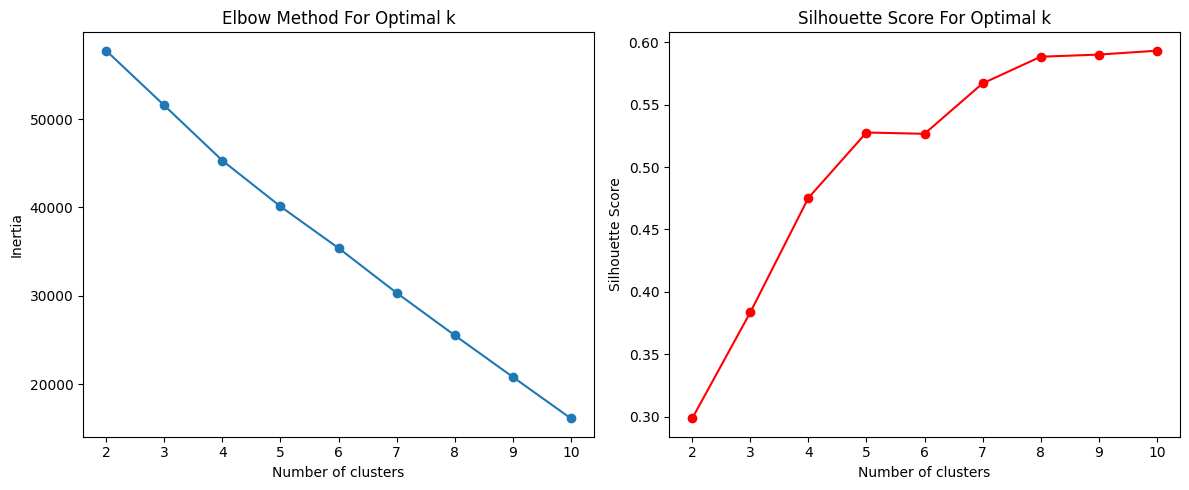

[(2, 0.29855216306240906),
 (3, 0.3835428285243567),
 (4, 0.4752372757793419),
 (5, 0.5276729202945144),
 (6, 0.5266426321981753),
 (7, 0.567008427167994),
 (8, 0.5884141513408782),
 (9, 0.5901428604558739),
 (10, 0.5932375876035926)]

In [21]:
# Attempting to determine the optimal number of clusters again

# Scaling the data
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Determining the optimal number of clusters using the Elbow Method and Silhouette Scores
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_clustering_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_clustering_data, kmeans.labels_))

# Plotting the Elbow Plot and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Displaying Silhouette Scores for reference
list(zip(K_range, silhouette_scores))
